In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy

In [11]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [12]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Box plot for Median value of owner-occupied homes

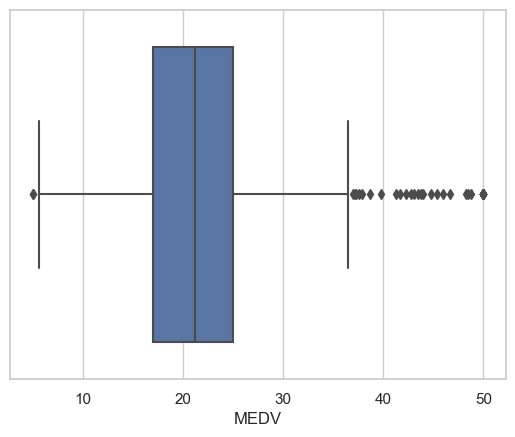

In [13]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="MEDV", data=boston_df)
plt.show()

### bar plot for the Charles river variable

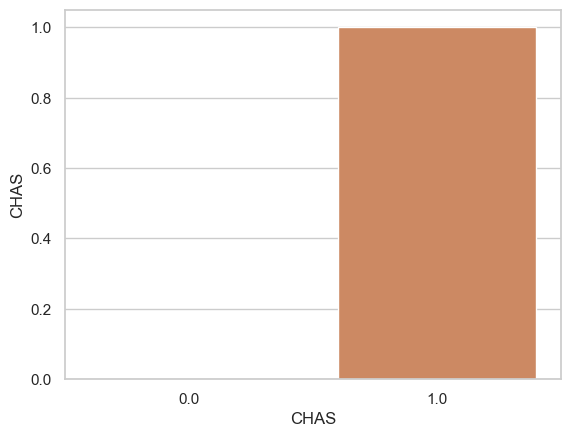

In [14]:
sns.barplot(x='CHAS',y="CHAS",  data=boston_df)
plt.show()

### boxplot for the MEDV variable vs the AGE variable

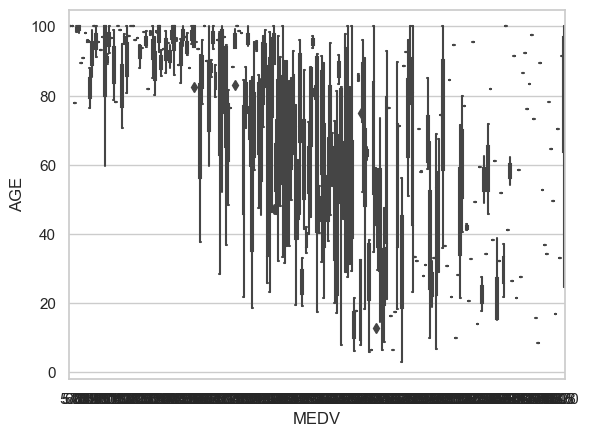

In [15]:
ax = sns.boxplot(x="MEDV",y = "AGE", data=boston_df)
plt.show()

### scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

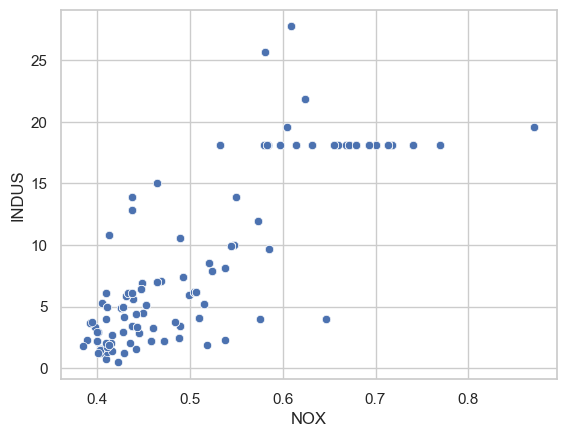

In [16]:
ax = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df)
plt.show()

there is a positive relation between Nitric oxide concentrations and the proportion of non-retail business acres per town

### histogram for the pupil to teacher ratio variable

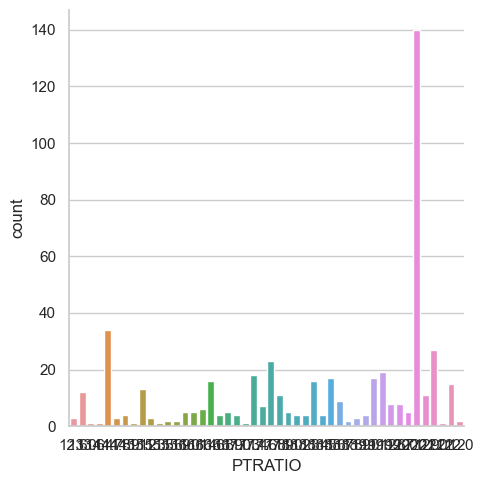

In [17]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)
plt.show()

In [25]:
import scipy.stats

### the null hypothesis is that there is no significant difference in median value of houses bounded by the Charles river or not

In [26]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == '0']["MEDV"],
                   boston_df[boston_df['CHAS'] == "1"]["MEDV"], equal_var = True)

Ttest_indResult(statistic=nan, pvalue=nan)

since th p value is smaller thean 0.05 we reject the null hypothesis

### the null hypothesis is that there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [28]:
group1 = boston_df[boston_df['AGE'] > 83]['MEDV']
group2 = boston_df[boston_df['AGE'] < 83]['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(group1, group2)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 69.65380770592326, P-Value: 6.897431296769751e-16


since p value is smaller than 0.05 we reject the null hypothesis

### the null hypothesis is that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [29]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

since the p value is smaller than 0.05 we reject the null hypothesis